<a href="https://colab.research.google.com/github/soeren2311/Practical-machine-learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [273]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## **Datensatz für Decisiontree erzeugen**

In [274]:
# Erstellen des Datensatzes als Pandas DataFrame
# company: u500 = 0 (weniger als 500 Mitarbeiter), ü500 = 1 (Mehr als 500 Mitarbeiter)
# income_60k: 0 <= 60k Jahresgehalt, 1 >= 60k Jahresgehalt

data = pd.DataFrame({
    "age": [22, 25, 47, 52, 23, 40, 30, 53, 31, 38],
    "company": [0, 0, 1, 0 , 1, 1, 1, 1, 0, 0],
    "income_60k": [0, 0, 1, 1, 0, 0, 1, 1, 0, 1]
})

In [275]:
data.dtypes

age           int64
company       int64
income_60k    int64
dtype: object

In [276]:
data.head()

,age,company,income_60k
0,22,0,0
1,25,0,0
2,47,1,1
3,52,0,1
4,23,1,0


In [277]:
# Aufteilen des Datensatzes in Trainings- und Testdaten (80% Trainingsdaten, 20 % Testdaten)
X = data.drop("income_60k", axis=1)
y = data["income_60k"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [278]:
# Anwenden eines Decision Trees auf Datensatz
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [279]:
# Vorhersagen mit dem Modell
y_pred = clf.predict(X_test)
# Die Genauigkeit des Entscheidungsbaums bewerten
accuracy = accuracy_score(y_test, y_pred)

print("Die Genauigkeit des Entscheidungsbaums beträgt:", accuracy)


Die Genauigkeit des Entscheidungsbaums beträgt: 0.5


## **Decisiontree plotten**

In [280]:
## Datensatz plotten (Libraries)
from sklearn.tree import export_graphviz
import graphviz

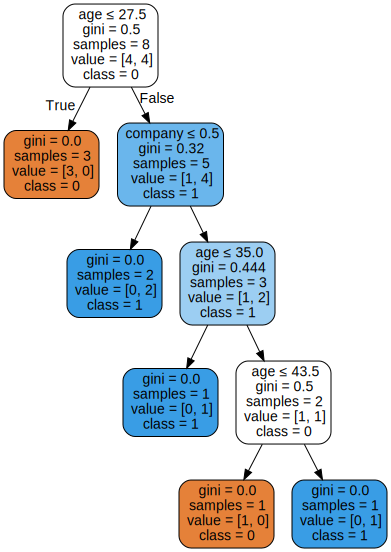

In [281]:
export_graphviz(clf, out_file='tree.dot', 
                feature_names=X_train.columns, class_names=['0', '1'], 
                filled=True, rounded=True, special_characters=True)

# Erstellen Sie das Graph-Objekt
graph = graphviz.Source(open('tree.dot').read())

# Zeigen Sie das Graph-Objekt an
graph

In [282]:
# Speichern Sie den Entscheidungsbaum als PDF
graph.render("decision_tree", format='pdf')

# Speichern Sie den Entscheidungsbaum als PNG
graph.render("decision_tree", format='png')

'decision_tree.png'